# Perkenalan

Graded Challenge 7

Nama : Kelvin Rizky Novsa
Batch: RMT-028

Dataset : [Link](https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews/data)

Objective: McDonald's, sebagai salah satu merek restoran cepat saji terbesar di dunia, ingin memahami sentimen konsumen terhadap pengalaman mereka di berbagai lokasi restoran McDonald's. Melalui analisis sentimen dari review konsumen, McDonald's dapat mengidentifikasi area-area yang memerlukan perbaikan, memperkuat area-area yang disukai, serta meningkatkan kepuasan pelanggan secara keseluruhan.

# Libraries

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [13]:
# Basic
import pandas as pd
import numpy as np
from scipy.stats import kruskal
# Viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Analyze tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
import keras_tuner
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as tf_hub
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
nltk.download('wordnet')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import pickle

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Melakukan import dataset menggunakan pandas dan menggunakan encoding latin-1
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/McDonald_s_Reviews.csv', encoding='latin1')

Menggunakan encoding latin1 karena jika tidak menggunakan terjadi error UnicodeDecodeError 'utf-8'. Latin1 digunakan untuk menggunakan format encoding untuk mewakili karakter-karater di dalam dataset [Sumber](https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas).

In [5]:
# Menampilkan 5 baris pertama dataset
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [6]:
# Menampilkan summary dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


Berdasarkan informasi summary diatas terdapat 33396 baris dan 10 kolom. Kemudian jika berfokus pada total baris dataset, terdapat missing value pada kolom latitude dan longitude. Oleh karena itu perlu dilakukan handling missing value dalam dataset ataupun tidak tergantung kepada kebutuhan.

# Exploratory Data Analysis

In [7]:
# Melakukan copy dataset

df_eda = df.copy()

Melakukan copy dataset untuk berfokus kepada EDA

In [8]:
# Menampilkan dataset setelah melakukan copy
df_eda

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


## Distribusi Data Rating

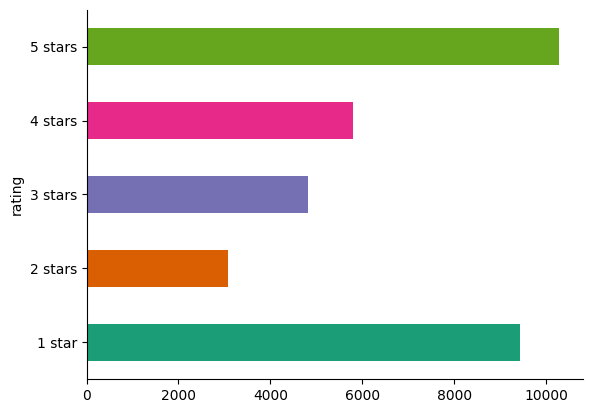

In [9]:
# Distribusi Rating

df_eda.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Berdasarkan visualisasi diatas dapat dilihat bahwa rating 5 mendominasi distribusi pada kolom rating. Hal tersebut dapat disimpulkan bahwa reviewer atau konsumen McD cukup senang atau puas dengan pelayanan yang diberikan oleh McD. Kemudian rating 1 menjadi rating peringkat 2 dalam kolom rating. Hal tersebut dapat disimpulkan bahwa reviewer atau konsumen McD kurang puas dengan pelayanan yang diberikan oleh McD.

## Menampilkan gambaran review konsumen

In [10]:
# pd.set_option('display_width', None)
sample_1_star = df_eda[df_eda['rating']=='1 star'].sample(n=5)
sample_2_stars = df_eda[df_eda['rating']=='2 stars'].sample(n=5)
sample_3_stars = df_eda[df_eda['rating']=='3 stars'].sample(n=5)
sample_4_stars = df_eda[df_eda['rating']=='4 stars'].sample(n=5)
sample_5_stars = df_eda[df_eda['rating']=='5 stars'].sample(n=5)

# print the document sample
print('Sample 1 Star')
print('-'*100)
for doc in range(0,5):
  print(sample_1_star.iloc[doc,8])
print('-'*100)

print('Sample 2 Stars')
print('-'*100)
for doc in range(0,5):
  print(sample_2_stars.iloc[doc,8])
print('-'*100)

print('Sample 3 Stars')
print('-'*100)
for doc in range(0,5):
  print(sample_3_stars.iloc[doc,8])
print('-'*100)

print('Sample 4 Stars')
print('-'*100)
for doc in range(0,5):
  print(sample_4_stars.iloc[doc,8])
print('-'*100)

print('Sample 5 Stars')
print('-'*100)
for doc in range(0,5):
  print(sample_5_stars.iloc[doc,8])
print('-'*100)


Sample 1 Star
----------------------------------------------------------------------------------------------------
This place is the worst.  It smelled like manure.  I had to go to the counter like 3 times before the order was complete. Cold fries and burnt apple pies. I didnt like this olace at all.  Next birthday for my grandson will be somewhere else.
Very slow restaurant
15 min for a happy meal i though this was a fast food restaurant
It's ok except for the security who makes you uncomfortable and rushes you to eat your food fast.
Security guardand staff  was high!
36 mins to get food and got told it's because we had a large order.   Service was super slow.  People waiting 30-45 mins for food is ridiculous. Oh and by large order it was 4 Happy meals and a couple 2 for 3.  Ugh very disappointed
----------------------------------------------------------------------------------------------------
Sample 2 Stars
---------------------------------------------------------------------------

Dengan tampilan review diatas dapat diketahui bahwa perlu dilakukan data cleaning, salah satunya lowercase, serta melakukan tokenization untuk membagi teks menjadi beberapa token. Adapun proses cleaning akan dilakukan pada proses text preprocessing.



## Distribusi Kata

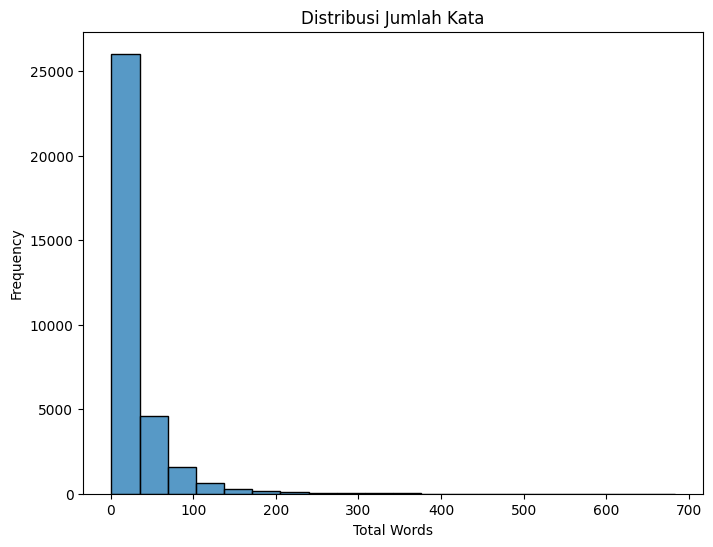

In [14]:
# Menambah kolom total word untuk melihat jumlah kata dalam sebuah review
df_eda['total_words'] = df_eda['review'].apply(lambda x: len(nltk.word_tokenize(x)))

# plot distribution of total words
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='total_words', bins=20)
plt.title('Distribusi Jumlah Kata')
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.show()

Berdasarkan visualisasi diatas, jumlah kata berkumpul pada rentang jumlah kata tertentu sehingga distribusi data tidak terdistribusi normal.

## WordCloud

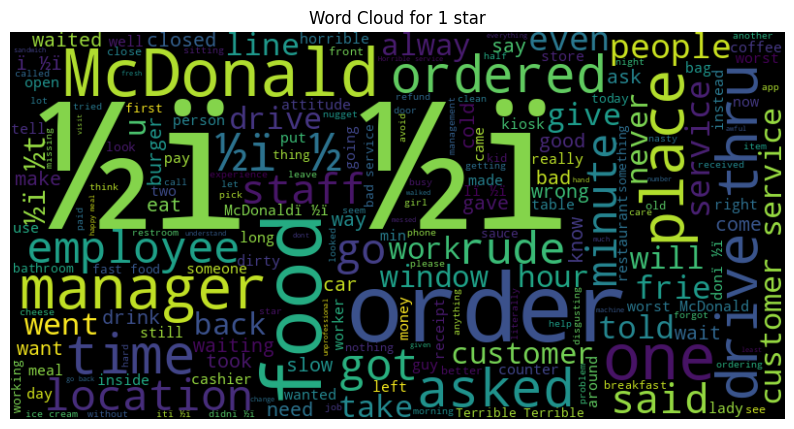

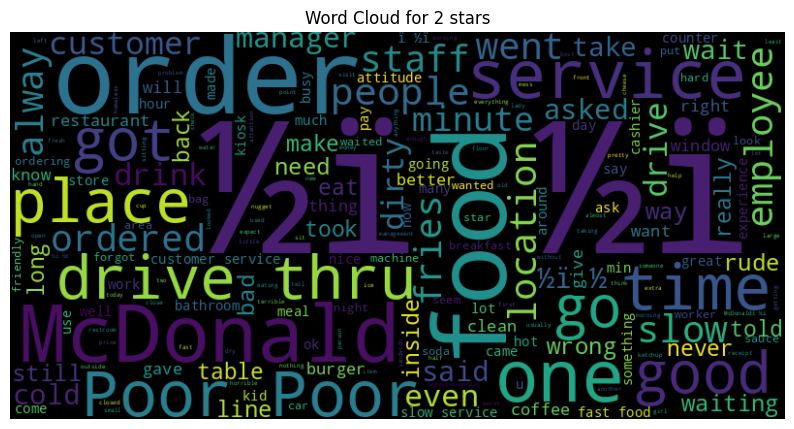

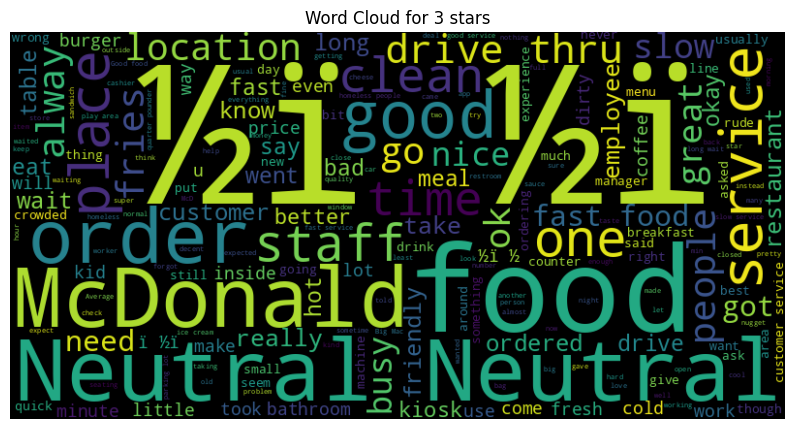

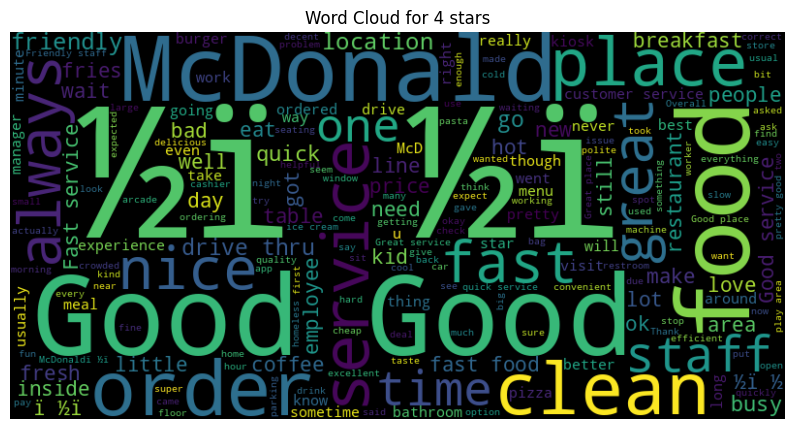

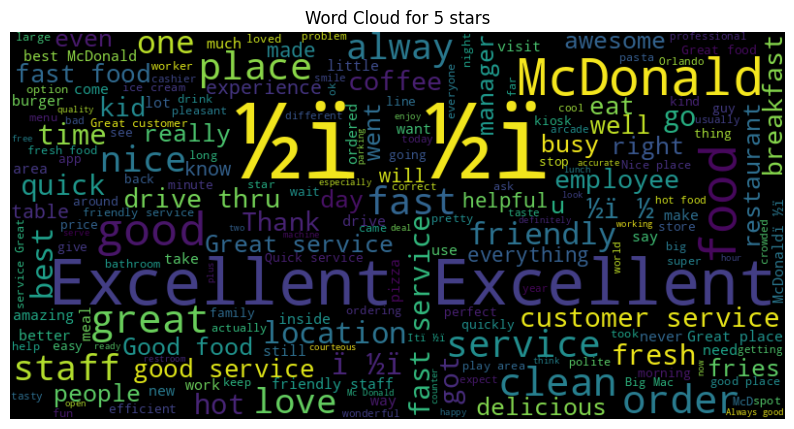

In [15]:
# List of rating categories
rating_categories = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Iterate through each rating category
for rating_category in rating_categories:
    # Select data for each rating
    text_combined = ' '.join(df_eda[df_eda['rating'] == rating_category]['review'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_combined)

    # Display word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {rating_category}')
    plt.axis('off')
    plt.show()

Berdasarkan visualisasi diatas diperoleh informasi:

- Terdapat kata 1/2 dan i dalam latin yang mendominasi disetiap rating sehingga tidak memiliki makna di setiap rating. Oleh karena itu dilakukan clening ataupun stopword.
- Kata food dan order juga mendominasi disetiap rating sehingga tidak memiliki makna di setiap rating. Oleh karena itu dilakukan clening ataupun stopword.


1 Star
- Pada rating 1 didominasi dengan kata employee, manager, place, time dan go. Hal tersebut mengindikasikan tentang pelayanan yang condong terkesan kurang baik atau buruk. Atau dapat dikatakan sentimen negatif atau tidak disukai.

2 Stars
- Pada rating 2 didominasi dengan kata poor, place, time, service, dan slow. Sama seperti rating 1, hal tersebut mengindikasikan tentang pelayanan yang condong terkesan kurang baik atau buruk. Atau dapat dikatakan sentimen negatif atau tidak disukai.

3 Stars
- Pada rating 3 didominasi dengan kata Neutral, time, place, dan clean. Sehingga dapat disimpulkan dalam rating 3 , konsumen berkomentar baik ataupun buruk tentang pelayanan McD. Namun mengingat terdapat kata service, place, dan clean hal tersebut cenderung terkesan kurang baik atau buruk, sehingga 3 stars masih tergolong dalam sentimen negatif atau tidak disukai.

4 Stars
- Pada rating 4 didominasi dengan kata good, quick, fast, friendly, dan nice. Sehingga dapat disimpulkan dalam rating 4 , konsumen berkomentar baik atau dapat dikatakan sentimen positif atau disukai.

5 Stars
- Pada rating 4 didominasi dengan kata excellent, great, good, friendly, dan nice. Sehingga dapat disimpulkan dalam rating 4 , konsumen berkomentar baik atau dapat dikatakan sentimen positif atau disukai.

# Feature Engineering

## Membuat kolom baru sebagai kolom target yang bernama liked

In [16]:
# Menambahkan kolom baru Disukai berdasarkan kolom rating dengan rating => menjadi 1(Disukai) dan 0 (tidak disukai)
df['rating'] = df['rating'].str.split().str[0]
df['rating'] = df['rating'].astype(int)
df['liked'] = 0
df.loc[df['rating'] >= 4, 'liked'] = 1

Dalam hal ini ingin membuat sebuah kolom target atau class sebagai penentu dari hasil review pada konsumen untuk mengetahui apakah konsumen memiliki preferensi terhadap makanan MCD. Adapun data kolom class diambil dari data rating dimana jika rating => 4 maka tergolong disukai konsumen (1 sebagai disukai), dan sisa ratingnya (1, 2, 3) tidak disukai.

In [17]:
# Menampilkan dataset setelah menambahkan kolom baru
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,liked
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,0
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,1
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,0
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,1
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,0
...,...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1,0
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5,1
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4,1
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5,1


In [18]:
# Menampilkan summary data setelah menambahkan kolom baru
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  int64  
 10  liked          33396 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.8+ MB


Berdasarkan informasi diatas dapat dilihat terdapat kolom baru "liked" sebagai target untuk menganalisis sentimen

## Membuang kolom yang tidak dibutuhkan

In [19]:
# Membuang kolom yang tidak dibutuhkan dalam dataset
df.drop(['reviewer_id', 'store_name', 'category',
         'store_address', 'latitude ', 'longitude',
         'rating_count', 'review_time', 'rating'], axis=1, inplace=True)

Dilakukannya drop kolom-kolom yang tidak dibutuhkan pada langka text preprocessing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  33396 non-null  object
 1   liked   33396 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 521.9+ KB


Menampilkan kembali informasi dataset setelah dilakukan drop data, yang mana terdapat 2 kolom dan 33396 baris.

## Text Preprocessing

Dalam text preprocessing dilakukan beberapa tahapan, diantarana adalah:

- Case folding: Mengubah semua huruf dalam teks menjadi huruf kecil untuk meminimalkan variasi dalam vocab yang disebabkan oleh huruf kapitalisasi.

- Hashtags removal: Menghapus hashtags (yang dimulai dengan '#') karena biasanya hanya berfungsi untuk mengkategorikan atau menyoroti teks, tanpa memberikan informasi sentimen yang berguna.

- Newline removal (\n): Menghapus karakter newline untuk menghilangkan noise dan memastikan teks tetap terstruktur.

- Whitespace removal: Menghapus whitespace tambahan dari teks untuk menjaga konsistensi dalam pemrosesan.

- Non-letter removal (emoticon, symbol): Menghapus karakter non-huruf untuk menghilangkan noise yang tidak relevan dengan analisis sentimen.

- Stopwords removal: Menghapus stopwords (kata-kata umum yang tidak memberikan banyak informasi seperti "the", "is", "are") dan kata-kata tambahan yang tidak relevan dengan analisis sentimen seperti "food" dan "order".

- Lemmatizing: Mengubah kata-kata menjadi bentuk dasarnya (lemmata) untuk mengurangi variasi dalam vocab dan memperbaiki representasi kata-kata. Hal ini dilakukan untuk menghindari mempertahankan bentuk yang sama dari kata-kata yang berbeda (misalnya, "running" dan "runs" akan diubah menjadi "run").

- Combining Tokens: Menggabungkan token-token kembali menjadi teks untuk output akhir.


In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Define Stopwords
from nltk.corpus import stopwords
stpwds_en = list(set(stopwords.words('english')))

In [23]:
# make variable for additional stop word
additional_stopwords = ['food','order', 'McDonald', '½', 'ï', '½ï', 'drive thru']

In [24]:
# Define Lemmatiizng
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub('[^a-zA-Z]', ' ', text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_en]
  tokens = [word for word in tokens if word not in additional_stopwords]

  #Lemmatizing
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

# Applying Text Preprocessing to the Dataset
df['review_processed'] = df['review'].apply(lambda x: text_preprocessing(x))

In [27]:
df

,review,liked,review_processed
0,Why does it look like someone spit on my food?...,0,look like someone spit normal transaction ever...
1,It'd McDonalds. It is what it is as far as the...,1,mcdonalds far atmosphere go staff make differe...
2,Made a mobile order got to the speaker and che...,0,made mobile got speaker checked line moving le...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1,mc crispy chicken sandwich customer service qu...
4,"I repeat my order 3 times in the drive thru, a...",0,repeat time drive thru still manage mess suppo...
...,...,...,...
33391,They treated me very badly.,0,treated badly
33392,The service is very good,1,service good
33393,To remove hunger is enough,1,remove hunger enough
33394,"It's good, but lately it has become very expen...",1,good lately become expensive


In [28]:
# Target Distribution

df['liked'].value_counts()

0    17335
1    16061
Name: liked, dtype: int64

Berdasarkan data diatas dapat dilihat bahwa distribusi liked sebagai class cukup seimbang.

## Splitting data

In [29]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.review_processed,
                                                    df.liked,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.liked)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (25547,)
Val Size   :  (2839,)
Test Size  :  (5010,)


Melakukan splitting data X dan y, dimana X merupakan variabel yang akan memengaruhi y (target), serta membagi X dan y menjadi 3 bagian, yaitu test, train, dan validation. Berdasarkan data diatas diketahui jumlah masing - masing data pada variabel X sebagai berikut:

Train:  25547 baris
Val  :  2839 baris
Test :  5010 baris

## Vectorizing

In [30]:
# Get Vocabularies
from sklearn.feature_extraction.text import CountVectorizer
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<25547x10823 sparse matrix of type '<class 'numpy.int64'>'
	with 253230 stored elements in Compressed Sparse Row format>

Melakukan Vectorizer guna mengonversi koleksi dokumen teks menjadi vektor fitur berdasarkan frekuensi kata-kata. Adapun Vectorize yang digunakan adalah CountVectorizer, dimana CountVectorizer mengubah teks menjadi representasi numerik yang dapat digunakan sebagai input untuk model machine learning.

In [31]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  10823
Maximum Sentence Length :  248 tokens


Variabel total vocab dibentuk untuk melihat jumlah kata unik, dimana datanya didapatkan dari proses CountVectorizing.

Kemudian, variabel max_sen_len dibentuk untuk menunjukkan panjang maksimum dari kalimat dalam X_train.

In [32]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

TextVectorization digunakan untuk mengubah teks menjadi representasi numerik yang sesuai untuk digunakan dalam model neural network.

## Word Embedding

In [33]:
# Embedding

from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

Word Embedding digunakan untuk membantu NLP memahami dan memproses bahasa manusia dengan cara yang lebih efisien, kontekstual, dan semantik.

# Sequential (NLP Training)

## Model Definition

In [34]:
# Model Training using LSTM
%%time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

CPU times: user 10.8 ms, sys: 0 ns, total: 10.8 ms
Wall time: 12.2 ms


Pengaturan seed memastikan bahwa pembangkitan angka acak memberikan hasil yang sama setiap kali kode dijalankan.

In [35]:
## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.HeNormal(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.HeNormal(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(1, activation='sigmoid'))

model_lstm_1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 248)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 248, 128)          1385344   
                                                                 
 bidirectional (Bidirection  (None, 248, 32)           18560     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 248, 32)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 16)                2624      
 onal)                                                           
                                                        

## Model Training

In [36]:
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/25
799/799 [==============================] - 358s 436ms/step - loss: 0.3771 - accuracy: 0.8385 - val_loss: 0.3154 - val_accuracy: 0.8588
Epoch 2/25
799/799 [==============================] - 346s 433ms/step - loss: 0.2666 - accuracy: 0.8950 - val_loss: 0.3056 - val_accuracy: 0.8746
Epoch 3/25
799/799 [==============================] - 335s 419ms/step - loss: 0.2186 - accuracy: 0.9139 - val_loss: 0.3213 - val_accuracy: 0.8743
Epoch 4/25
799/799 [==============================] - 343s 429ms/step - loss: 0.1817 - accuracy: 0.9278 - val_loss: 0.3326 - val_accuracy: 0.8774
Epoch 5/25
799/799 [==============================] - 357s 447ms/step - loss: 0.1587 - accuracy: 0.9362 - val_loss: 0.3742 - val_accuracy: 0.8764
Epoch 6/25
799/799 [==============================] - 343s 429ms/step - loss: 0.1437 - accuracy: 0.9411 - val_loss: 0.3955 - val_accuracy: 0.8746
Epoch 7/25
799/799 [==============================] - 333s 416ms/step - loss: 0.1303 - accuracy: 0.9463 - val_loss: 0.4025 -

## Model Evaluation

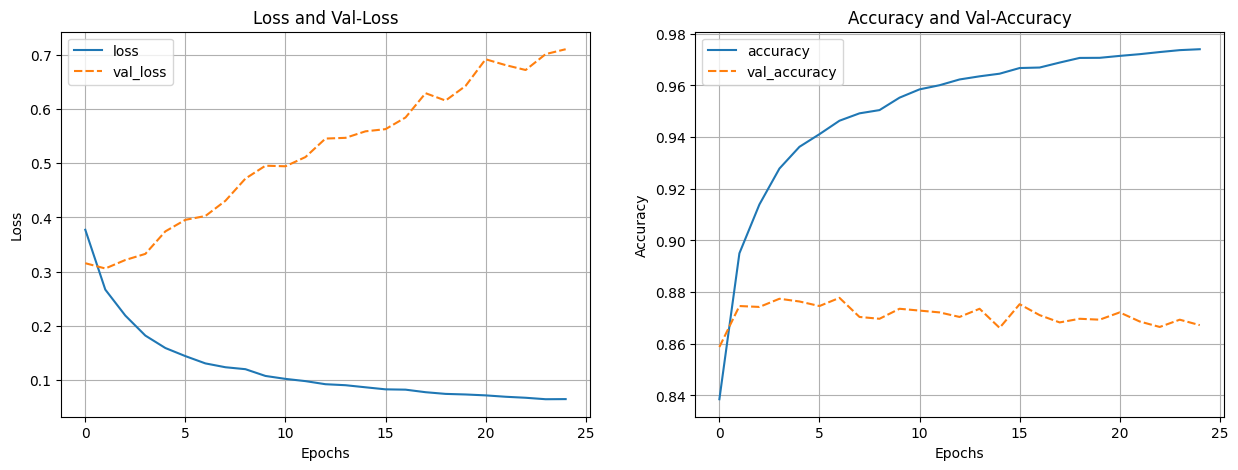

In [37]:
# Plot training results

history_seq_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df[['loss', 'val_loss']])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy and Val-Accuracy')
plt.show()

In [38]:
# Model Evaluation (test-set)

y_pred_seq = model_lstm_1.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print('Accuracy: ', accuracy_score(y_test, y_pred_seq), '\n')
print('Clasification Report: \n', classification_report(y_test, y_pred_seq), '\n')

157/157 [==============================] - 14s 75ms/step
Accuracy:  0.8602794411177644 

Clasification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2601
           1       0.87      0.84      0.85      2409

    accuracy                           0.86      5010
   macro avg       0.86      0.86      0.86      5010
weighted avg       0.86      0.86      0.86      5010
 



## Analysis

Alasan terkait set up model:

-   Dipilih Neural Netword LTSM karena model cukup baik dengan dataset berbentuk text dan memiliki size yang besar. Adapun alasan memakai LTSM lainnya adalah agar menghindari informasi data yang hilang saat perpindahan nya antar neuron. Adapun kelemahan dari LSTM, waktu runtime yang lebih lama dibanding GRU.

-  Menggunakan dropout 0.1 untuk tiap neuron tidak bergantung dengan yang lain

-   Dipilih sequential API karena ingin mengaplikasikan rangkaian yang sederhana dengan ekspektasi runtime yang lebih rendah

-   Diterapkan jumlah hidden layer dan neuron sedikit, untuk meminimalisasi runtime, mengingat dataset yang cukup besar

-   Diterapkan 25 epooch dengan batch_size berjumlah 32 meminimalisasi runtime

-   Tidak digunakan transfer learning untuk melihat performance model sebelum dioptimalisasi

Analisis hasil performance model:

- Grafik Loss vs Val Loss

Performance model: Over fit

Berdasarkan visualisasi grafik Model Training, didapatkan bahwa grafik loss dan val-loss berjalan berjauhan dan gap yang diberikan cukup jauh. Kemudian pada grafik val-loss terjadi peningkatan seiring dengan peningkatan epochs. Oleh karena itu model dapat dikatakan over fit.

- Grafik Accuracy vs Val Accuracy

Performance model: Over fit

Berdasarkan visualisasi grafik Model Training, didapatkan bahwa grafik accuracy dan val-accuracy berjalan berjauhan dan gap yang diberikan cukup jauh. Kemudian pada grafik val-accuracy tidak terjadi peningkatan sama sekali seiring dengan peningkatan epochs. Oleh karena itu model dapat dikatakan over fit.


Oleh karena itu, perlu dilakukan improvisasi model agar dapat meningkatkan peforma model. Dalam hal ini menggunakan Transfer Learning dan mengubah nilai Dropout 0.1 menjadi 0.5 dalam model Improvement.

# Sequntial NLP Improvement

In [45]:
# Download the Embedding Layer

# url = 'https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1'

url = 'https://tfhub.dev/google/nnlm-en-dim128/2'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

## Model Definition

In [46]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [47]:
## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.HeNormal(seed))))
model_lstm_2.add(Dropout(0.5))
model_lstm_2.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.HeNormal(seed))))
model_lstm_2.add(Dropout(0.5))
model_lstm_2.add(Dense(1, activation='sigmoid'))

model_lstm_2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## Model Training

In [48]:
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/25
799/799 [==============================] - 138s 162ms/step - loss: 0.6032 - accuracy: 0.6769 - val_loss: 0.5803 - val_accuracy: 0.6819
Epoch 2/25
799/799 [==============================] - 124s 155ms/step - loss: 0.5516 - accuracy: 0.7179 - val_loss: 0.5145 - val_accuracy: 0.7474
Epoch 3/25
799/799 [==============================] - 133s 166ms/step - loss: 0.5230 - accuracy: 0.7394 - val_loss: 0.4986 - val_accuracy: 0.7559
Epoch 4/25
799/799 [==============================] - 125s 157ms/step - loss: 0.5106 - accuracy: 0.7453 - val_loss: 0.4872 - val_accuracy: 0.7605
Epoch 5/25
799/799 [==============================] - 124s 155ms/step - loss: 0.4986 - accuracy: 0.7552 - val_loss: 0.4779 - val_accuracy: 0.7732
Epoch 6/25
799/799 [==============================] - 123s 154ms/step - loss: 0.4909 - accuracy: 0.7607 - val_loss: 0.4769 - val_accuracy: 0.7735
Epoch 7/25
799/799 [==============================] - 126s 158ms/step - loss: 0.4821 - accuracy: 0.7651 - val_loss: 0.4826 -

## Model Evaluation

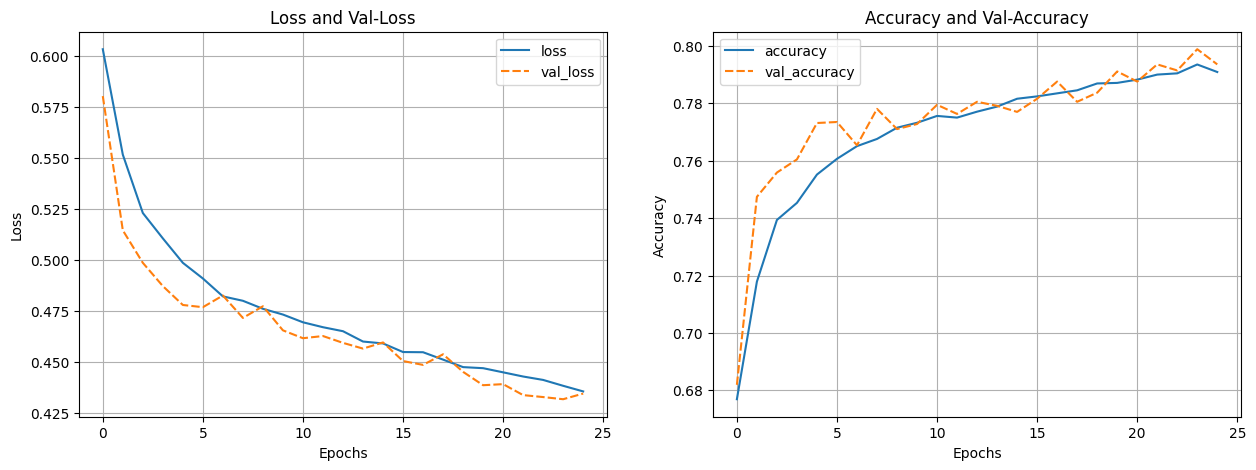

In [49]:
# Plot training results

history_seq_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df[['loss', 'val_loss']])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy and Val-Accuracy')
plt.show()

In [50]:
# Model Evaluation (test-set)

y_pred_seq = model_lstm_2.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print('Accuracy: ', accuracy_score(y_test, y_pred_seq), '\n')
print('Clasification Report: \n', classification_report(y_test, y_pred_seq), '\n')

157/157 [==============================] - 7s 31ms/step
Accuracy:  0.7926147704590818 

Clasification Report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      2601
           1       0.78      0.80      0.79      2409

    accuracy                           0.79      5010
   macro avg       0.79      0.79      0.79      5010
weighted avg       0.79      0.79      0.79      5010
 



## Analysis

Alasan terkait set up model Improvement:

-  Menggunakan dropout 0.5 untuk tiap neuron tidak bergantung dengan yang lain dan dapat meningkatkan peforma model dibandingkan model sebelumnya.

-   Menggunakan transfer learning dengan link yang terdapat pada cell untuk melihat performance model sebelum dioptimalisasi

Analisis hasil performance model:

- Grafik Loss vs Val Loss

Performance model: Good fit

Berdasarkan visualisasi grafik Model Training, didapatkan bahwa grafik loss dan val-loss berjalan beriringan atau grafik saling berdekatan dan gap yang diberikan kecil atau tidak jauh. Adapun kedua grafik menunjukkan penurunan, yang berarti setiap peningkatan epochs maka error atau loss berkurang. Oleh karena itu, model improvement sudah dapat dikatakan goodfit.

Adapun nilai loss dari 0.600 menjadi 0.430 setelah dilakukan improvement

- Grafik Accuracy vs Val Accuracy

Performance model: good fit

Berdasarkan visualisasi grafik Model Training, didapatkan bahwa grafik accuracy dan val-accuracy berjalan beriringan atau grafik saling berdekatan dan gap yang diberikan kecil atau tidak jauh. Adapun kedua grafik menunjukkan peningkatan, yang berarti setiap peningkatan epochs maka accuracy model akan meningkat. Oleh karena itu, model improvement sudah dapat dikatakan goodfit.

Adapun nilai accuracy dari 0.67 menjadi 0.79 setelah dilakukan improvement


# Model Saving

In [51]:
# Freeze model

model_lstm_2.trainable = False
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 32)           2304      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 32)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 16)                2624      
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [52]:
model_lstm_2.save('sentiment_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
model_lstm_2.save('sentimentt_model.keras')

In [54]:
# Save model
model_lstm_2.save('model_improved', save_format='tf')

# Conclusion

1. Penjelasan Macam-Macam Hasil Metric Evaluasi dan Interpretasinya:

Model NLP Sebelum improvement

Loss: Pada model NLP sebelum improvement didapatkan informasi bahwa terjadi peningkatan pada grafik val-loss dan penurunan pada grafik loss, yang berarti grafik tidak berjalan beriringan atau gap yang diberikan cukup besar. Hal tersebut dapat intepretasikan bahwa pada model sebelum improvement overfit.

Accuracy: Pada model NLP sebelum improvement didapatkan informasi bahwa tidak terjadi perubahan grafik val-accuracy dan peningkatan pada grafik accuracy, yang berarti grafik tidak berjalan beriringan atau gap yang diberikan cukup besar. Hal tersebut dapat intepretasikan bahwa pada model sebelum improvement overfit.

Model NLP Setelah improvement

Loss: Pada model NLP setelah improvement didapatkan informasi bahwa terjadi penurunan pada grafik val-loss dan  grafik loss, yang berarti grafik berjalan beriringan atau gap yang diberikan kecil. Hal tersebut dapat intepretasikan bahwa pada model setelah improvement goodfit.

Accuracy: Pada model NLP setelah improvement didapatkan informasi bahwa terjadi peningkatan pada grafik val-accuracy dan  grafik accuracy, yang berarti grafik berjalan beriringan atau gap yang diberikan kecil. Hal tersebut dapat intepretasikan bahwa pada model setelah improvement goodfit


2. Kelemahan/Kekurangan dan Kelebihan dari Model:

Model Sebelum Improvement: Kelemahan utama model sebelum improvement adalah overfitting, yang ditandai oleh gap yang besar antara loss/accuracy pada data pelatihan dan validasi. Ini menunjukkan bahwa model terlalu menghafal data pelatihan dan tidak dapat melakukan generalisasi dengan baik pada data baru. Namun, kelebihannya adalah menggunakan arsitektur LSTM yang baik dalam menangani data teks dan dapat menangkap hubungan temporal dalam teks dengan baik.

Model Setelah Improvement: Model setelah improvement mengalami peningkatan dalam kinerja dengan mengurangi dropout menjadi 0.5 dan menggunakan transfer learning. Hal ini membantu mengurangi overfitting dan meningkatkan generalisasi model. Namun, kekurangannya adalah waktu komputasi yang mungkin lebih tinggi karena menggunakan nilai dropout yang lebih tinggi dan memanfaatkan transfer learning.

3. Futher Improvement

- Menyesuaikan penyusunan arsitektur model dengan menambah atau menghapus lapisan untuk menangani data yang lebih kompleks atau mempercepat proses pelatihan.

- Melakukan fine-tuning lebih lanjut terhadap model dengan eksperimen yang lebih luas terhadap hyperparameter atau teknik lainnya untuk meningkatkan performa model.

4. Insight EDA

- Didapatkan informasi pada visualisasi WordCloud, dapat dilihat bahaw terdapat kata-kata yang terdapat diseluruh rating oleh karena itu perlu dilakukan stopword. Kemudian dari hasil wordcloud per rating juga didapatkan informasi bahwa

Dengan demikian program NLP ini cukup berhasil dalam menganalisis sentimen disukai atau tidak disukai dari hasil review oleh konsumen McDonald dengan akurasi yang diperoleh sebesar 79 persen. Adapun berdasarkan f1_score sentimen tidak disukai dapat diprediksi sebesar 80 persen, dan sentimen disukai 79 persen.